In [1]:
from sklearn.model_selection import train_test_split
import matplotlib as plt
from sklearn.datasets import make_regression
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X1 = [0.4300608492, 0.4693650017, 0.3739401681, 0.4237014451, 0.3585735797, 0.5232334448, 0.379249692, 0.1038552039, 0.09843106359, 0.06318909322, 0.1719151809, 0.6797712237, 0.3372263282, 0.8700327066, 0.07149243914, 0.7177308206, 0.6719649795, 0.4399862948, 0.7354503753, 0.04682939544, 0.1829700454]
X2 = [0.1284386275, 0.4283009351, 0.6779831411, 0.7746485585, 0.9806956752, 0.1591688013, 0.1146682282, 0.4826136877, 0.8996689748, 0.7588761737, 0.4714381532, 0.5101320135, 0.4654739766, 0.2967197532, 0.8719297756, 0.1015926591, 0.4181989748, 0.8474683291, 0.1849821527, 0.486671388, 0.5426450601]
X3 = [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
X4 = [0.515755817, 0.7741178994, 0.7746668932, 0.4457647357, 0.9201354818, 0.3441948672, 0.06167280648, 0.4374561178, 0.3587277939, 0.9039157817, 0.1755058982, 0.40196862, 0.01504013205, 0.3912070908, 0.6937443224, 0.1818386166, 0.8878171487, 0.3104027541, 0.3633200958, 0.7504294619, 0.9169358785]
Y = [7.036291625, 1.483929105, 7.895788275, 5.725513819, 3.396479383, 7.817832735, 5.367703594, 0.9778110361, 2.945688232, 5.861816692, 5.48419723, 7.827907526, 8.108328945, 5.320862371, 5.13464181, 2.791153037, 2.839569872, 0.7084403009, 7.348131171, 5.910831216, 4.73622351]

d = {"X1":X1, "X2":X2, "X3":X3, "X4":X4, "Y":Y}
data_fr = pd.DataFrame(d)
data_fr

,X1,X2,X3,X4,Y
0,0.430061,0.128439,1,0.515756,7.036292
1,0.469365,0.428301,0,0.774118,1.483929
2,0.373940,0.677983,0,0.774667,7.895788
3,0.423701,0.774649,0,0.445765,5.725514
4,0.358574,0.980696,1,0.920135,3.396479
5,0.523233,0.159169,1,0.344195,7.817833
6,0.379250,0.114668,0,0.061673,5.367704
7,0.103855,0.482614,1,0.437456,0.977811
8,0.098431,0.899669,1,0.358728,2.945688
9,0.063189,0.758876,0,0.903916,5.861817


In [3]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      21 non-null     float64
 1   X2      21 non-null     float64
 2   X3      21 non-null     int64  
 3   X4      21 non-null     float64
 4   Y       21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 968.0 bytes


In [4]:
data_fr.describe()

,X1,X2,X3,X4,Y
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.388046,0.504872,0.428571,0.505934,4.986626
std,0.248730,0.277645,0.507093,0.289417,2.340899
min,0.046829,0.101593,0.000000,0.015040,0.708440
25%,0.171915,0.296720,0.000000,0.344195,2.945688
50%,0.379250,0.482614,0.000000,0.437456,5.367704
75%,0.523233,0.758876,1.000000,0.774118,7.036292
max,0.870033,0.980696,1.000000,0.920135,8.108329


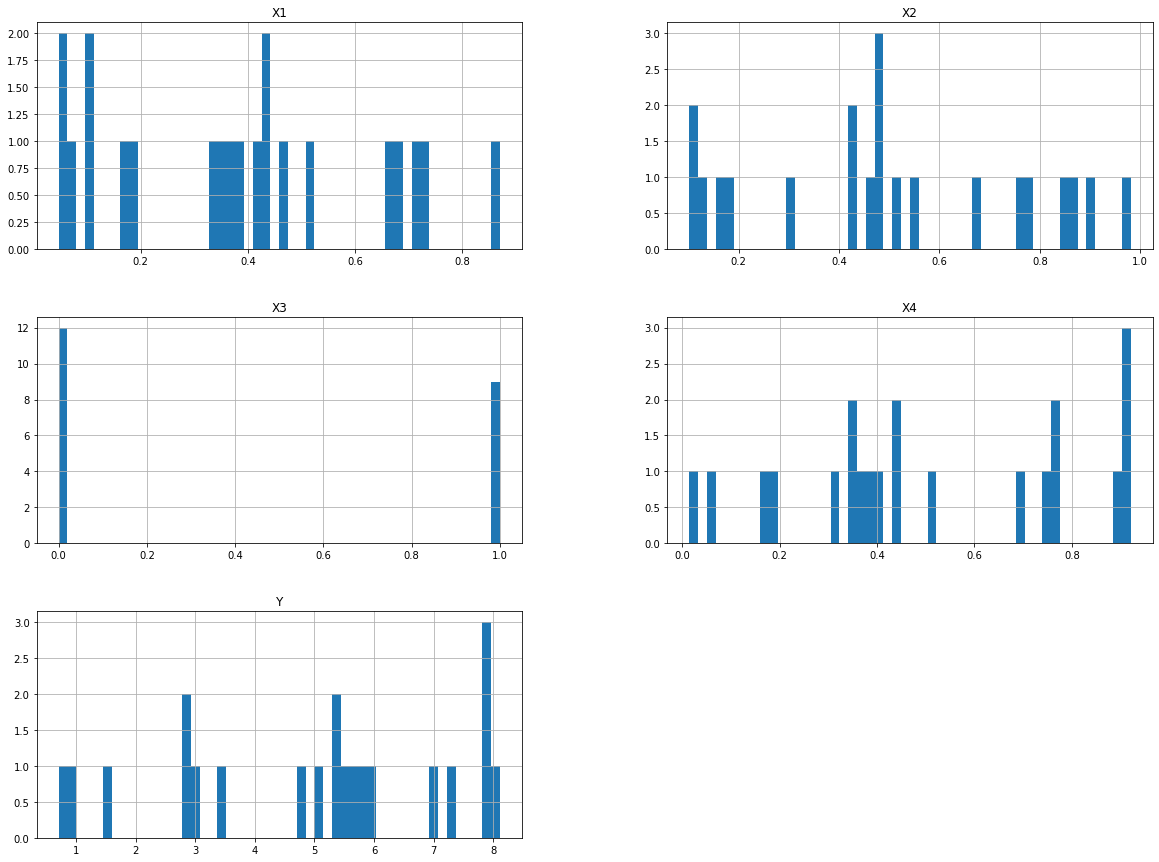

In [5]:
data_fr.hist(bins=50, figsize=(20,15))
plt.show()

(array([2., 1., 2., 2., 0., 2., 5., 1., 2., 4.]),
 array([0.7084403 , 1.44842917, 2.18841803, 2.92840689, 3.66839576,
        4.40838462, 5.14837349, 5.88836235, 6.62835122, 7.36834008,
        8.10832895]),
 <a list of 10 Patch objects>)

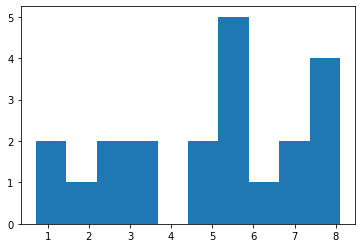

In [6]:
plt.hist(data_fr['Y'])

In [7]:
data = sk.datasets.make_regression(
    n_samples=200+10*2, 
    n_features=10+6+6, 
    n_informative=10+6, 
    n_targets=1, 
    noise=10*3,
    shuffle=False, 
    bias=2, 
    random_state=None,

    effective_rank=None, 
    tail_strength=0.5,  
    coef=False
)

data_fr = pd.DataFrame(data[0])
data_fr.columns=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15','c16','c17','c18','c19','c20','c21']
data_fr

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21
0,0.519124,0.135650,-0.962515,0.695871,-0.415777,-1.695099,-1.501288,-0.142013,-0.764286,1.766590,-0.997602,-1.974911,2.478777,0.761154,-0.658584,-0.459707,0.475877,0.070372,-0.116466,-0.284702,-0.985351,-0.622143
1,-0.905595,-1.454165,-0.585062,-0.291663,-0.884774,-2.068114,0.517033,-0.814063,0.568968,1.392169,1.793270,0.811316,1.712677,-0.012415,1.550157,-0.694143,-0.219873,1.079816,0.042613,-1.374487,1.065068,0.389774
2,-1.317002,0.483286,0.057841,-0.143880,-0.335887,0.024518,0.018877,1.356238,-0.486241,0.470124,0.788054,-0.275650,-1.710485,0.248522,1.017296,-1.222953,-0.418235,0.798748,-0.023041,0.010929,-0.010837,-0.316367
3,1.570287,0.162981,0.696467,0.665293,-0.476323,-0.452604,-0.621450,-0.952789,0.679480,0.800082,0.794046,-0.531180,-1.476351,1.085114,0.530321,-0.027724,0.587011,-1.014480,0.539446,-0.109932,-0.102226,-2.716842
4,1.723015,-1.640443,-0.258002,-0.197379,-0.334525,1.017935,0.832666,0.525270,1.415679,-1.507738,0.644936,1.433454,-1.704720,0.687006,0.031436,-2.319709,-0.109215,1.580487,0.652458,-0.597443,0.960600,0.351243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,-0.381190,0.086170,-0.076052,0.066243,0.773897,0.906160,-2.225448,-0.334120,1.745066,1.289561,0.385227,-0.459831,-0.953100,-1.036239,-0.528232,-0.389618,-1.699328,0.720334,-1.276828,-0.768768,0.730656,1.140992
216,0.065685,1.005638,-0.800967,-0.091983,0.235347,1.782305,2.001704,-0.501328,-0.820184,-0.252774,-0.112012,-0.980311,-1.582345,0.355414,-0.832410,-0.388081,-1.104957,0.391012,-0.013639,-1.042434,-0.540711,0.000172
217,1.759669,0.552018,-0.717424,-0.644478,-0.190637,0.322412,0.377159,-0.384801,0.919339,-0.423684,0.599332,-1.239910,-0.837315,0.003617,0.512905,-1.138341,0.135912,0.642420,2.685357,-1.515847,-0.224545,0.654281
218,-0.038106,0.310464,-0.009645,-1.162149,0.174861,-0.482662,2.320058,0.475588,0.010936,0.020688,0.284535,1.092630,-1.089724,-0.713960,2.780151,-0.779986,-0.546936,-1.941524,-0.792638,1.049795,-1.085275,0.748784


In [8]:
train_set, test_set, y_train, y_test = train_test_split(data_fr, data[1], test_size=0.09, random_state=42)

print(f"tamaño entrenamiento features {train_set.shape}")
print(f"tamaño test features {test_set.shape}")
print(f"tamaño entrenamiento respuesta {y_train.shape}")
print(f"tamaño test respuesta {y_test.shape}")

tamaño entrenamiento features (200, 22)
tamaño test features (20, 22)
tamaño entrenamiento respuesta (200,)
tamaño test respuesta (20,)


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 189 to 102
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c0      200 non-null    float64
 1   c1      200 non-null    float64
 2   c2      200 non-null    float64
 3   c3      200 non-null    float64
 4   c4      200 non-null    float64
 5   c5      200 non-null    float64
 6   c6      200 non-null    float64
 7   c7      200 non-null    float64
 8   c8      200 non-null    float64
 9   c9      200 non-null    float64
 10  c10     200 non-null    float64
 11  c11     200 non-null    float64
 12  c12     200 non-null    float64
 13  c13     200 non-null    float64
 14  c14     200 non-null    float64
 15  c15     200 non-null    float64
 16  c16     200 non-null    float64
 17  c17     200 non-null    float64
 18  c18     200 non-null    float64
 19  c19     200 non-null    float64
 20  c20     200 non-null    float64
 21  c21     200 non-null    float64
dtype

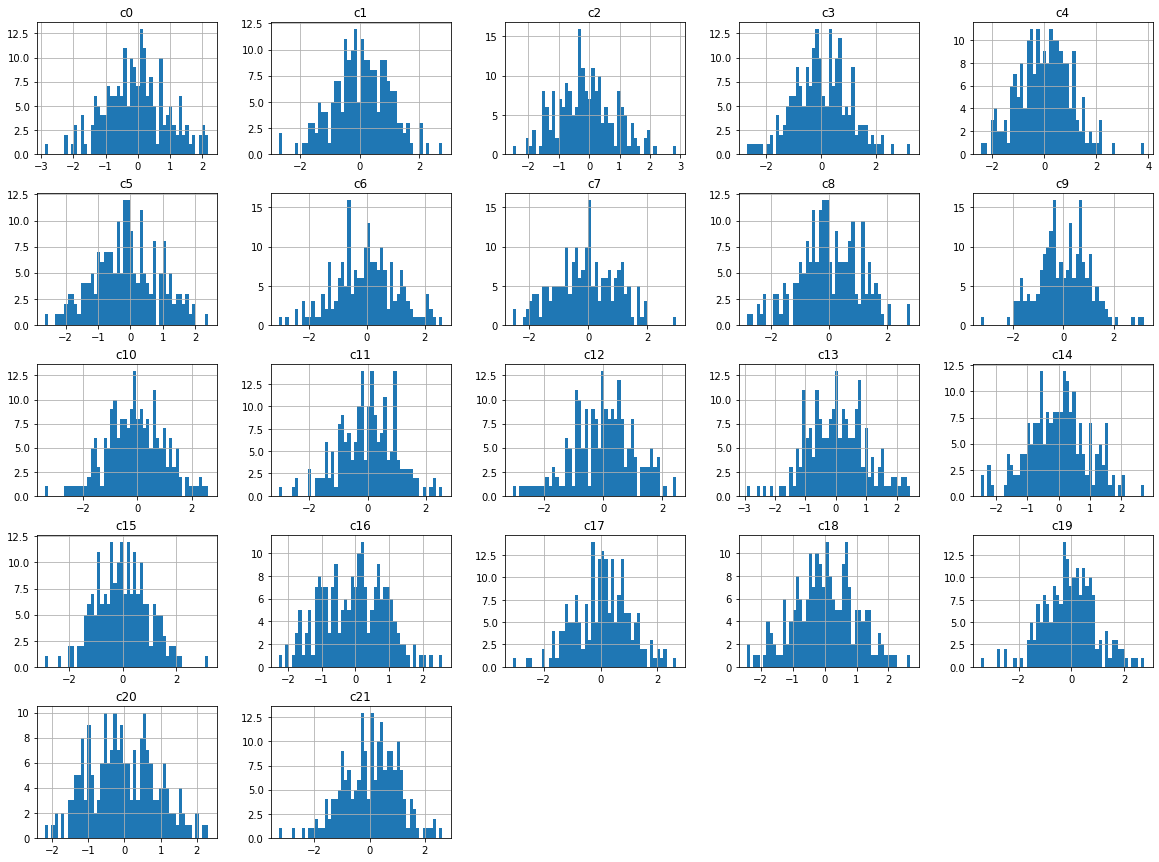

In [10]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
train_data = train_set.copy()
train_data['y'] = y_train
mat_corr = train_data.corr()
mat_corr

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,y
c0,1.000000,-0.062017,-0.115654,0.007633,0.060111,-0.122541,0.112939,-0.064566,-0.028181,-0.028189,0.008680,-0.043719,-0.000620,0.012907,0.094362,-0.072215,-0.109604,-0.092809,0.036636,0.113877,-0.050056,-0.001299,0.160803
c1,-0.062017,1.000000,-0.058345,0.079734,0.075218,-0.120378,-0.086549,-0.041222,-0.080451,0.060121,-0.063980,0.041512,-0.068148,-0.086959,-0.046309,0.080707,0.056968,0.010336,0.064221,0.123652,0.115124,-0.031647,0.070224
c2,-0.115654,-0.058345,1.000000,0.007688,-0.194241,0.154142,0.103715,-0.046467,0.038993,-0.053845,-0.019597,-0.002771,0.119640,-0.007484,0.070642,-0.094539,0.074143,0.024798,0.033144,0.034157,-0.030280,-0.003752,0.301335
c3,0.007633,0.079734,0.007688,1.000000,0.026220,0.018146,0.028178,-0.050570,-0.013249,0.022105,0.079797,-0.047123,0.049708,0.069017,0.109285,0.134145,0.146120,-0.022269,0.065525,0.040162,0.086104,-0.033733,0.121825
c4,0.060111,0.075218,-0.194241,0.026220,1.000000,0.017997,-0.034408,0.106532,-0.035488,-0.054249,-0.079869,0.051090,-0.016445,-0.096425,-0.040560,0.064315,-0.107230,0.125373,0.005400,-0.088325,-0.009609,-0.017370,0.083337
c5,-0.122541,-0.120378,0.154142,0.018146,0.017997,1.000000,0.163992,-0.043245,0.130846,-0.014795,-0.011320,-0.116027,0.009634,0.044478,0.098139,-0.050424,-0.112065,0.035373,-0.059642,-0.051883,-0.049708,0.002322,0.378483
c6,0.112939,-0.086549,0.103715,0.028178,-0.034408,0.163992,1.000000,-0.049528,0.012639,-0.046518,-0.006489,0.010241,0.032596,-0.057464,0.092993,-0.099071,-0.052585,0.074811,-0.006242,0.090235,-0.044511,-0.056318,0.471963
c7,-0.064566,-0.041222,-0.046467,-0.050570,0.106532,-0.043245,-0.049528,1.000000,0.029551,-0.009747,0.166407,0.047003,-0.078402,-0.004367,-0.070801,-0.013521,-0.022230,0.053155,0.038803,-0.074704,-0.041303,-0.123779,0.144826
c8,-0.028181,-0.080451,0.038993,-0.013249,-0.035488,0.130846,0.012639,0.029551,1.000000,-0.049036,0.012428,-0.086690,0.019823,0.024677,0.053667,-0.132049,-0.110620,0.055429,-0.057413,-0.072458,0.012491,0.026927,0.306366
c9,-0.028189,0.060121,-0.053845,0.022105,-0.054249,-0.014795,-0.046518,-0.009747,-0.049036,1.000000,-0.022138,-0.122006,0.153192,0.011621,0.189654,0.048968,-0.044064,0.007219,0.079754,0.010798,-0.067991,0.009162,0.362367


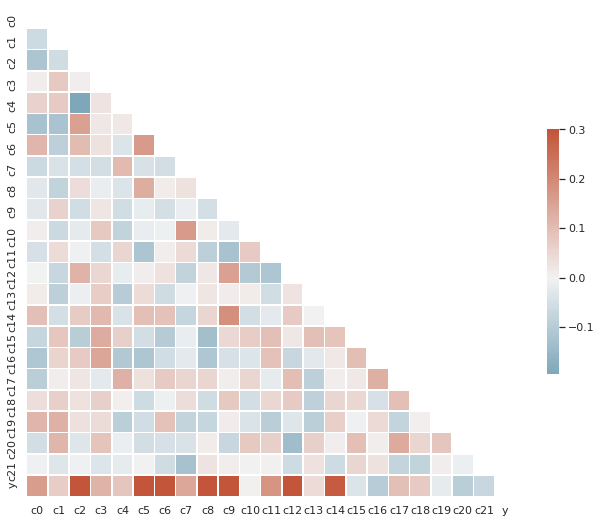

In [12]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(mat_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mat_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

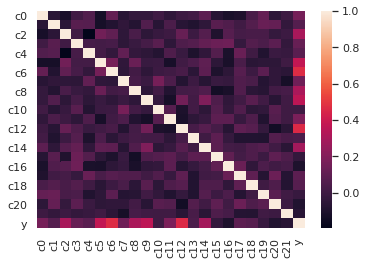

In [13]:
#sns.heatmap(mat_corr, annot=True) 
sns.heatmap(mat_corr)

In [14]:
train_set = sm.add_constant(train_set, prepend=True)
model1 = sm.OLS(endog=y_train, exog=train_set)
model1 = model1.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     502.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          3.74e-147
Time:                        18:34:23   Log-Likelihood:                -959.37
No. Observations:                 200   AIC:                             1965.
Df Residuals:                     177   BIC:                             2041.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8036      2.299      1.654      0.1

In [15]:
train_set.drop('c16', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     522.4
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          5.21e-148
Time:                        18:34:23   Log-Likelihood:                -960.70
No. Observations:                 200   AIC:                             1965.
Df Residuals:                     178   BIC:                             2038.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4508      2.297      1.503      0.1

In [16]:
train_set.drop('c18', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     551.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          2.19e-149
Time:                        18:34:23   Log-Likelihood:                -960.70
No. Observations:                 200   AIC:                             1963.
Df Residuals:                     179   BIC:                             2033.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4455      2.288      1.506      0.1

In [17]:
train_set.drop('c17', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     581.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          1.22e-150
Time:                        18:34:23   Log-Likelihood:                -961.05
No. Observations:                 200   AIC:                             1962.
Df Residuals:                     180   BIC:                             2028.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3077      2.279      1.451      0.1

In [18]:
train_set.drop('c20', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     616.3
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          5.85e-152
Time:                        18:34:23   Log-Likelihood:                -961.26
No. Observations:                 200   AIC:                             1961.
Df Residuals:                     181   BIC:                             2023.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4010      2.270      1.498      0.1

In [19]:
train_set.drop('c19', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     650.9
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          4.62e-153
Time:                        18:34:23   Log-Likelihood:                -962.05
No. Observations:                 200   AIC:                             1960.
Df Residuals:                     182   BIC:                             2019.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6205      2.266      1.598      0.1

In [20]:
train_set.drop('c21', axis='columns', inplace=True)
train_set = sm.add_constant(train_set, prepend=True)
model2 = sm.OLS(endog=y_train, exog=train_set)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     692.9
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          2.37e-154
Time:                        18:34:23   Log-Likelihood:                -962.40
No. Observations:                 200   AIC:                             1959.
Df Residuals:                     183   BIC:                             2015.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6964      2.262      1.634      0.1

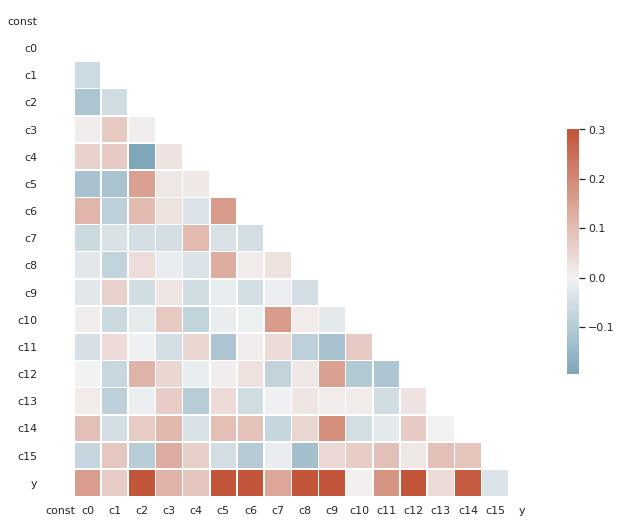

In [21]:
train_data = train_set.copy()
train_data['y'] = y_train
mat_corr = train_data.corr()
mat_corr
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(mat_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mat_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
train_data

,const,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,y
189,1.0,0.723684,-0.426712,-0.935057,0.721895,-0.537768,0.034266,-0.370177,-0.312380,0.377171,1.399013,-2.485184,-3.053603,-0.206857,0.302430,0.302530,0.421118,-135.043262
96,1.0,0.342929,0.473869,1.053525,0.902448,-0.857163,2.404189,1.378275,-0.117638,-1.745511,-0.418058,0.671588,-0.867049,0.154803,0.726448,0.157020,-0.951565,229.215138
210,1.0,-0.180163,0.801591,-0.542830,-2.587262,0.344472,-0.480580,-0.635773,-2.496293,1.144097,-0.007121,-0.821233,-0.273628,-0.824229,-1.281108,-0.290846,-0.982573,-312.807347
25,1.0,-1.616916,-0.839234,-0.121926,-1.421446,1.032727,0.206536,-0.208770,-0.349649,-0.148665,-0.297439,0.647862,-1.690696,0.223511,-0.703115,-0.506786,1.905325,-360.584603
127,1.0,0.678793,0.309740,1.644047,0.452153,0.215781,-1.016013,-1.212015,0.951761,2.806631,-0.755858,-0.454699,-0.130549,1.109221,-1.224374,-1.119711,0.482267,185.873630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.021904,-1.335096,2.873310,-0.625833,-1.094981,1.000487,-0.090477,1.148350,1.639613,0.350856,-0.252433,0.025452,0.143810,-1.011562,-0.062106,-0.037075,325.046598
14,1.0,1.330931,-0.160412,-0.990034,0.741665,0.121235,-1.700095,0.462484,1.343861,0.273938,0.719758,0.374110,-0.046679,-0.858481,-0.538573,0.416009,-0.008701,-9.131165
92,1.0,1.279533,0.310702,-0.771799,1.071594,0.037794,1.547766,0.163851,-0.013855,-0.778862,0.633532,1.638526,-0.206378,-2.056449,1.175180,-0.253443,-1.268780,-3.624205
179,1.0,-0.907646,0.097148,0.372752,1.365251,0.474869,1.401454,0.173094,0.884725,0.798126,-0.437464,2.361129,0.184154,-0.547089,-0.677690,0.599211,0.258898,198.056676


In [46]:
y = y_train
x = train_set
x.shape

train_set.drop('const', axis='columns', inplace=True)
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm1.coef_

array([54.76952281, 48.30519271, 57.69273474, 15.97734306, 26.88133213,
       76.57114711, 85.60085474, 49.61209703, 66.90302482, 86.59258748,
        4.23187539, 77.80482836, 91.81215733, 16.48199489, 22.77391424,
       -1.37479342])

In [48]:
lm1.intercept_

3.696365596607606

In [49]:
lm1.score(train_set,y_train)

0.983760724723006

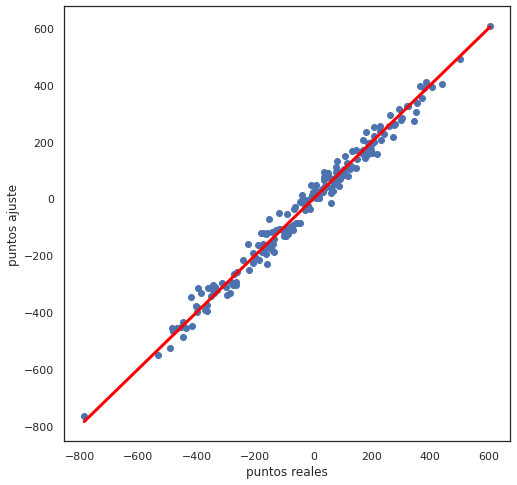

In [50]:
# pintar reales vs predichos
fig = plt.figure(figsize=(8, 8))
y_pred = lm1.predict(train_set)
plt.scatter(y, y_pred)
plt.xlabel("puntos reales")
plt.ylabel("puntos ajuste")
plt.plot([min(y), max(y)], [min(y), max(y)], color = 'red', linewidth = 3)
plt.show()

In [51]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [52]:
parameters = {
    'alpha':[10],
    'l1_ratio':[0.95]
}
print(parameters)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
print(cv)

{'alpha': [10], 'l1_ratio': [0.95]}
RepeatedKFold(n_repeats=2, n_splits=5, random_state=42)


In [53]:
elasticNet = ElasticNet()
Srch = GridSearchCV(elasticNet, parameters, scoring='neg_mean_squared_error', cv=cv)
result = Srch.fit(train_set,y_train)

print(result)
print(result.best_score_)
print(result.best_params_)

best_elastic = result.best_estimator_
print(best_elastic)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [10], 'l1_ratio': [0.95]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)
-12172.069670502631
{'alpha': 10, 'l1_ratio': 0.95}
ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.95,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [54]:
e_net = ElasticNetCV(cv=10, l1_ratio = 0.95)
result = e_net.fit(train_set,y_train)
print(result)

e_net = ElasticNet(alpha=10, l1_ratio=0.95)
result = e_net.fit(train_set,y_train)
print(result)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.95, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.95,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [58]:
#test_set.drop('c16', axis='columns', inplace=True)
#test_set.drop('c17', axis='columns', inplace=True)
#test_set.drop('c18', axis='columns', inplace=True)
#test_set.drop('c19', axis='columns', inplace=True)
#test_set.drop('c20', axis='columns', inplace=True)
#test_set.drop('c21', axis='columns', inplace=True)

test_set
y_predict = e_net.predict(test_set)
print(y_predict)

y_predict_2 = lm1.predict(test_set)
print(y_predict_2)

[ -20.34430768 -213.81095876  -55.38021799  116.6748536   -68.96504653
  -40.89839754  241.93787221  114.010197   -135.17928511  229.50988829
  -89.46811232  216.50000004 -245.28501292  -50.63123844   93.41211655
  142.77247447   96.31679144  133.09769223   48.00683233   -0.85055408]
[ -42.92526527 -314.5764497    -7.25094904  157.20417902 -107.34302544
   -5.90782762  408.77932942  175.79969919 -208.36381741  407.05756387
 -146.18781426  372.82595166 -403.87358343  -60.72008468  135.74281772
  228.72714055  180.62192002  381.1329627    89.98111463    9.46713665]


In [59]:
print(mean_squared_error(y_predict,y_test))
print(mean_squared_error(y_predict_2,y_test))

9455.334069277147
957.708422454529
